In [1]:
from itertools import product
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import trading as trd

In [48]:
# relaod module after modifying it
import importlib
importlib.reload(trd.portfolio)
importlib.reload(trd.benchmarks)
importlib.reload(trd)

<module 'trading' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\trading\\__init__.py'>

In [4]:
STOCK_DATA_LOC = join('..', 'data', 'stocks')
HI_BETA_LOC = join(STOCK_DATA_LOC, 'high_beta')
LO_BETA_LOC = join(STOCK_DATA_LOC, 'low_beta')

lo_beta_files = glob.glob(join(LO_BETA_LOC, '*.csv'))
hi_beta_files = glob.glob(join(HI_BETA_LOC, '*.csv'))

In [5]:
stock_pair_files = product(lo_beta_files, hi_beta_files)

In [6]:
class StockPair:
    def __init__(self, lo, hi, hist_lo, hist_hi):
        self.lo = hi
        self.hi = lo
        self.hist_lo = hist_lo
        self.hist_hi = hist_hi

In [7]:
stock_pairs = []

for pair in stock_pair_files:
    L, H =  map(lambda f: splitext(basename(f))[0], pair)
    hist_l, hist_h = map(lambda f: trd.read_stock_history(f), pair)
    stock_pairs.append(StockPair(L, H, hist_l, hist_h))
    
stock_pairs = np.array(stock_pairs)

In [37]:
s1 = trd.StockHolding(12, 4500)
s2 = trd.StockHolding(18, 2500)
cash = 1000
total = s1+s2+cash

In [50]:
def cust_plt(ax, data, label='', **kwargs):
    ax.plot_date(data.index, data, ls='solid', marker='', label=label, **kwargs)

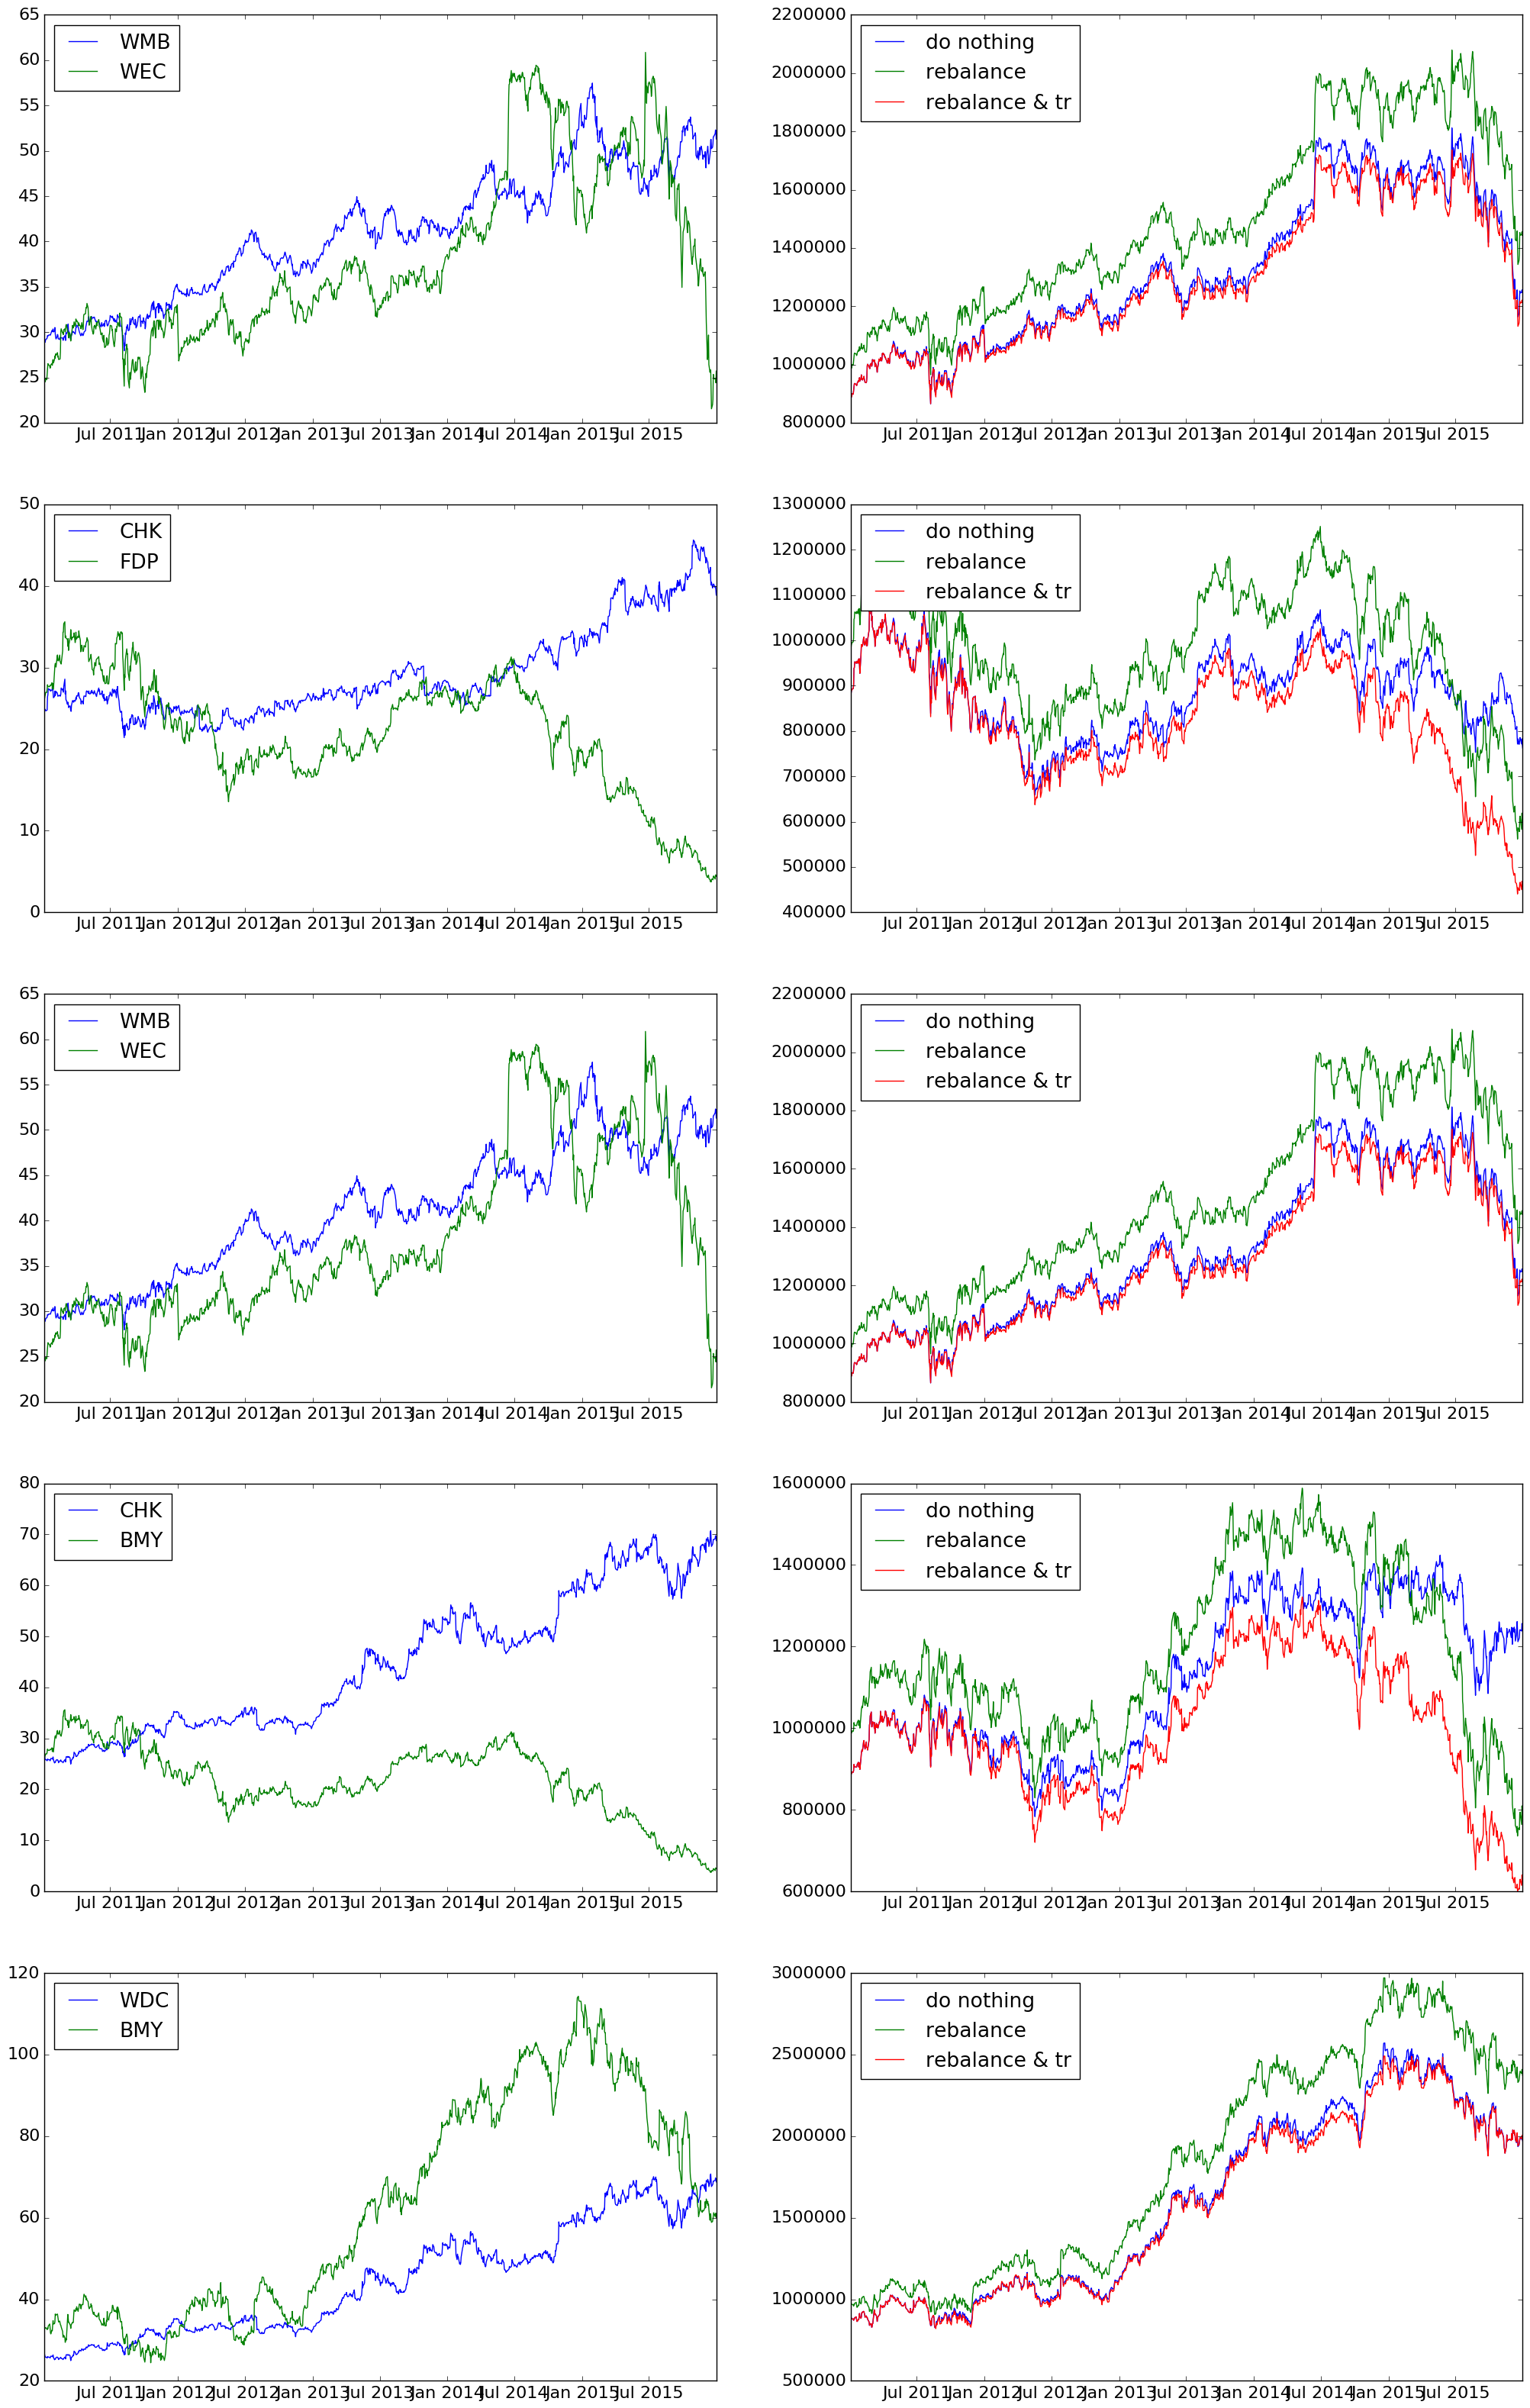

In [51]:
N = 5
rand_is = np.random.randint(0, len(stock_pairs), N)
data = stock_pairs[rand_is]

trans_cost = 3

matplotlib.rc('font', size=16)
f = plt.figure(figsize=(25, 40))

for i, pr in enumerate(data):
    lo_name = pr.lo
    hi_name = pr.hi
    lo = pr.hist_lo
    hi = pr.hist_hi
    
    do_nothing = trd.do_nothing_benchmark(lo, hi, trans_cost=trans_cost)
    rebal = trd.rebalance_benchmark(lo, hi, rebalance_period=30)
    rebal_tr = trd.rebalance_benchmark(lo, hi, rebalance_period=80, trans_cost=trans_cost)
    
    ax1 = plt.subplot(N, 2, 2*i + 1)
    cust_plt(ax1, lo, lo_name)
    cust_plt(ax1, hi, hi_name)
    ax1.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
    ax2 = plt.subplot(N, 2, 2*i + 2)
    cust_plt(ax2, do_nothing.total, 'do nothing')
    cust_plt(ax2, rebal.total, 'rebalance ')
    cust_plt(ax2, rebal_tr.total, 'rebalance & tr')
    ax2.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

    